In [100]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [46]:
titanic = pd.read_csv("D:/Jobin/DataTrained/Project/titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [47]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


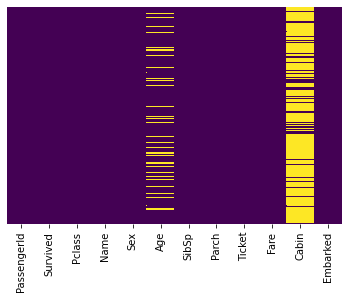

In [49]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

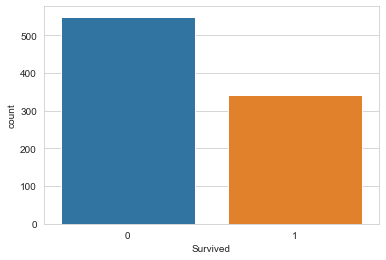

In [55]:
sns.set_style("whitegrid")
sns.countplot("Survived", data = titanic)

More than 500 people died. 300+ people survived

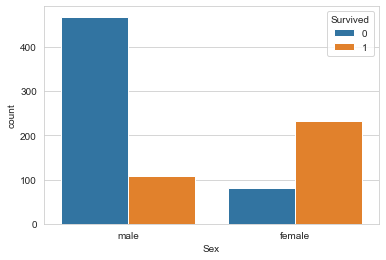

In [57]:
sns.countplot("Sex", hue = "Survived", data = titanic)

Females passengers have more probability of survival than that of male passengers

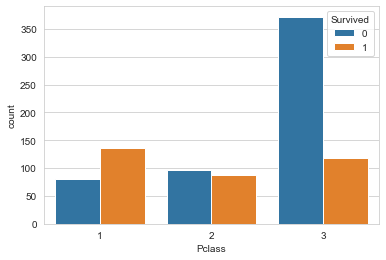

In [61]:
sns.countplot("Pclass", hue = "Survived", data = titanic)

First class passengers have more probabiolity of survival, whereas 3rd class have lesser

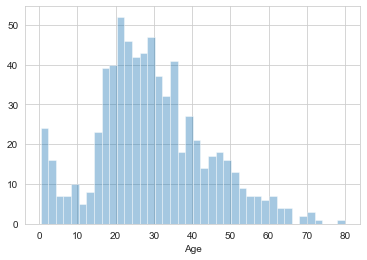

In [63]:
sns.distplot(titanic["Age"].dropna(), kde = False, bins = 40)

Age is normally distributed since it's like a bell curve. Most of the people are in around 15-40 range

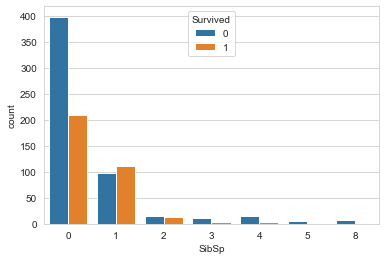

In [64]:
sns.countplot("SibSp", hue = "Survived", data = titanic)

Single passenger has more probability to die

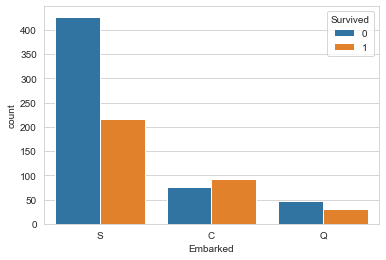

In [81]:
sns.countplot("Embarked", hue = "Survived", data = titanic)

In [ ]:
Most people embarked from S. People from C has more survival rate

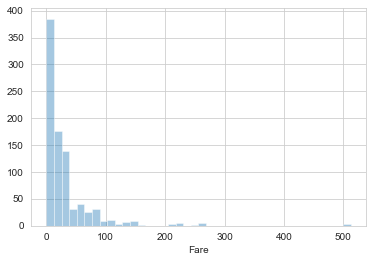

In [65]:
sns.distplot(titanic["Fare"], kde = False, bins = 40)

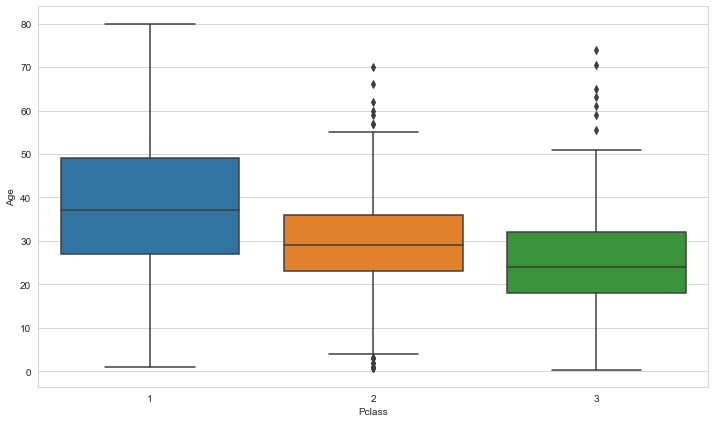

In [70]:
plt.figure(figsize = (12,7))
sns.boxplot(x = "Pclass", y = "Age", data = titanic)

We can see that the passengers in higher class tend to be older 

We can use average age values to impute based on Pclass

In [71]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [73]:
titanic["Age"] = titanic[["Age", "Pclass"]].apply(impute_age, axis = 1)

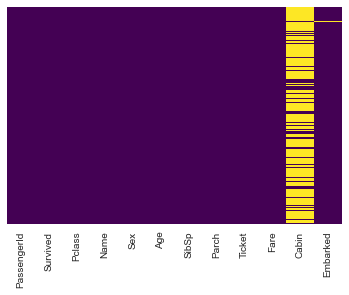

In [76]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

Null values in Age column is replaced completely with respective averages. Now we need to take care of Cabin column. But cabin column has a lot of null values. hence we can drop it

In [77]:
titanic.drop("Cabin", axis = 1, inplace = True)

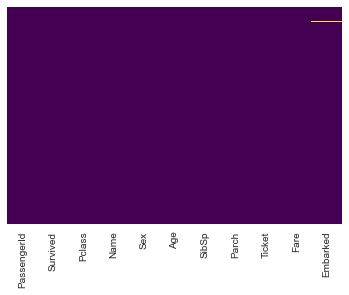

In [78]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

In [82]:
#to find null values
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

Now we have 2 null values in Embarked column. Since most people boarded from S, we can replace the null values with S

In [83]:
titanic["Embarked"].fillna("S", inplace = True)

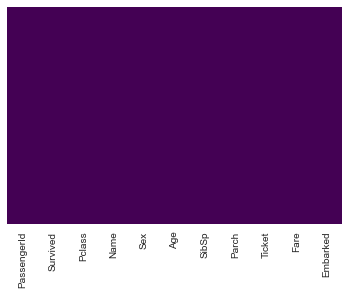

In [84]:
sns.heatmap(titanic.isnull(), yticklabels = False, cbar = False, cmap = "viridis")

Now we can see that all null values are removed

In [86]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Now we need to convert the Sex and Embark data into numbers so that we can put them into the machine learning system. Also, we don't need the columns Passenger ID, name, and ticket because they don't play any role in survival probability

In [90]:
sex = pd.get_dummies(titanic["Sex"], drop_first = True)
sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [91]:
embark = pd.get_dummies(titanic["Embarked"], drop_first = True)
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [92]:
titanic.drop(["Sex", "Embarked", "Name", "Ticket", "PassengerId"], axis = 1, inplace = True)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [93]:
titanic = pd.concat([titanic, sex, embark], axis = 1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


Now the data is ready. Survived is the dependant variable and others are independant variables

Since it's a yes or no type of data, we can use logistic regression. We can split the data into training set and test set

In [94]:
titanic.drop("Survived", axis = 1).head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1
3,1,35.0,1,0,53.1000,0,0,1
4,3,35.0,0,0,8.0500,1,0,1


In [95]:
titanic["Survived"].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

In [193]:
X_train, X_test, Y_train, Y_test = train_test_split(titanic.drop("Survived", axis = 1), titanic["Survived"], test_size = 0.15, random_state = 150)

Training and predicting

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

LogisticRegression()

In [196]:
predictions = LR.predict(X_test)
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1], dtype=int64)

In [197]:
from sklearn.metrics import confusion_matrix, classification_report

In [198]:
accuracy = confusion_matrix(Y_test, predictions)
accuracy

array([[75,  5],
       [12, 42]], dtype=int64)

In [199]:
from sklearn.metrics import accuracy_score

In [200]:
accuracy = accuracy_score(Y_test, predictions)
accuracy

0.8731343283582089

In [201]:
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        80
           1       0.89      0.78      0.83        54

    accuracy                           0.87       134
   macro avg       0.88      0.86      0.86       134
weighted avg       0.87      0.87      0.87       134



In [202]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [203]:
print('Mean absolute error:', mean_absolute_error(Y_test, predictions))
print('Mean squared error:', mean_squared_error(Y_test, predictions))
print('Root Mean squared error:', np.sqrt(mean_squared_error(Y_test, predictions)))

Mean absolute error: 0.12686567164179105
Mean squared error: 0.12686567164179105
Root Mean squared error: 0.35618207653079775


In [204]:
from sklearn.metrics import r2_score
print(r2_score(Y_test, predictions))

0.4726851851851852


In [206]:
import pickle
filename = 'pickletitanicLR.pkl'
pickle.dump(LR, open(filename, 'wb'))